# Kuznets Hypothesis on Carbon Emissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## What is the Environmental Kuznets Curve Hypothesis?

Since the early 1990s, economists and econometricians have been industrious in estimating empirical relations between GDP and environmental quality indicators. Typically, they have used cross-sectional data—country data for a particular year. For some quality indicators, they have found a relation that looks like an inverse U. The Y-axis is in terms of the level of environmental degradation (e.g carban emissions, pollution, water quality, deforestation). The X-axis would be the GDP per capita. 

<img src="assets/kuznets.jpg"/>

The interpretation is simple. Very poor countries with low industrialization are not damaging the environment much and as a result the environmental quality indicator is good (in this case, a low sulfur emission). When the country starts the growth process, the environmental damages will increase. When income per capita increases, the demand for a cleaner environment will increase, environmental legislation will be enacted, and the environment will improve. Because the curve is similar (but inverse) to the curves Kuznets (Economic Growth and Income Inequality, 1955) estimated for the relationship between income inequality and GDP per capita, they have been known as the environmental Kuznets curves (Mäler 2001). 
In the US this could be seen in terms of air or water quality, where the skies or rivers were very polluted in the 1960s, until the Clean Air Act and Clean Water Act were passed and Air Quality and Water Quality improved.  Another motivation for the downward slope would be the idea that at some point a wealthier society demands environmental improvements.  

However - could this hold for the potentially most important Pollutant C02, the main driver of anthropogenic climate change.  Controversially the impacts of global CO2 pollution are not experienced locally, but are experienced as global effects. So it is not clear whether the Environmental Kuznets hypothesis will hold.  

In this notebook, we'll look at C02 Kuznets curve for an association between the amount of CO2 emitted per capita (t/CO2) and the growing GDP per capita (USD).

## Import data

In [2]:
co2_table = pd.read_csv('../data/raw-data/our-world-in-data/co2-emissions-vs-gdp.csv').drop(['417485-annotations','Population (historical estimates)','Code'], axis=1)
co2_table = co2_table.rename(columns={'Entity': 'Country', 'Annual CO2 emissions (per capita)': 'CO2 emissions'})
co2_table

,Country,Year,CO2 emissions,GDP per capita,Continent
0,Abkhazia,2015,NaN,NaN,Asia
1,Afghanistan,1949,0.0019,NaN,NaN
2,Afghanistan,1950,0.0109,1156.0,NaN
3,Afghanistan,1951,0.0117,1170.0,NaN
4,Afghanistan,1952,0.0115,1189.0,NaN
...,...,...,...,...,...
62416,Zimbabwe,1900,NaN,NaN,NaN
62417,Zimbabwe,1901,NaN,NaN,NaN
62418,Zimbabwe,1902,NaN,NaN,NaN
62419,Zimbabwe,2021,NaN,NaN,NaN


#### Low Income Countries
Let's start by selecting a set of Low Income Countries to graph the movement of CO2 intensity. 

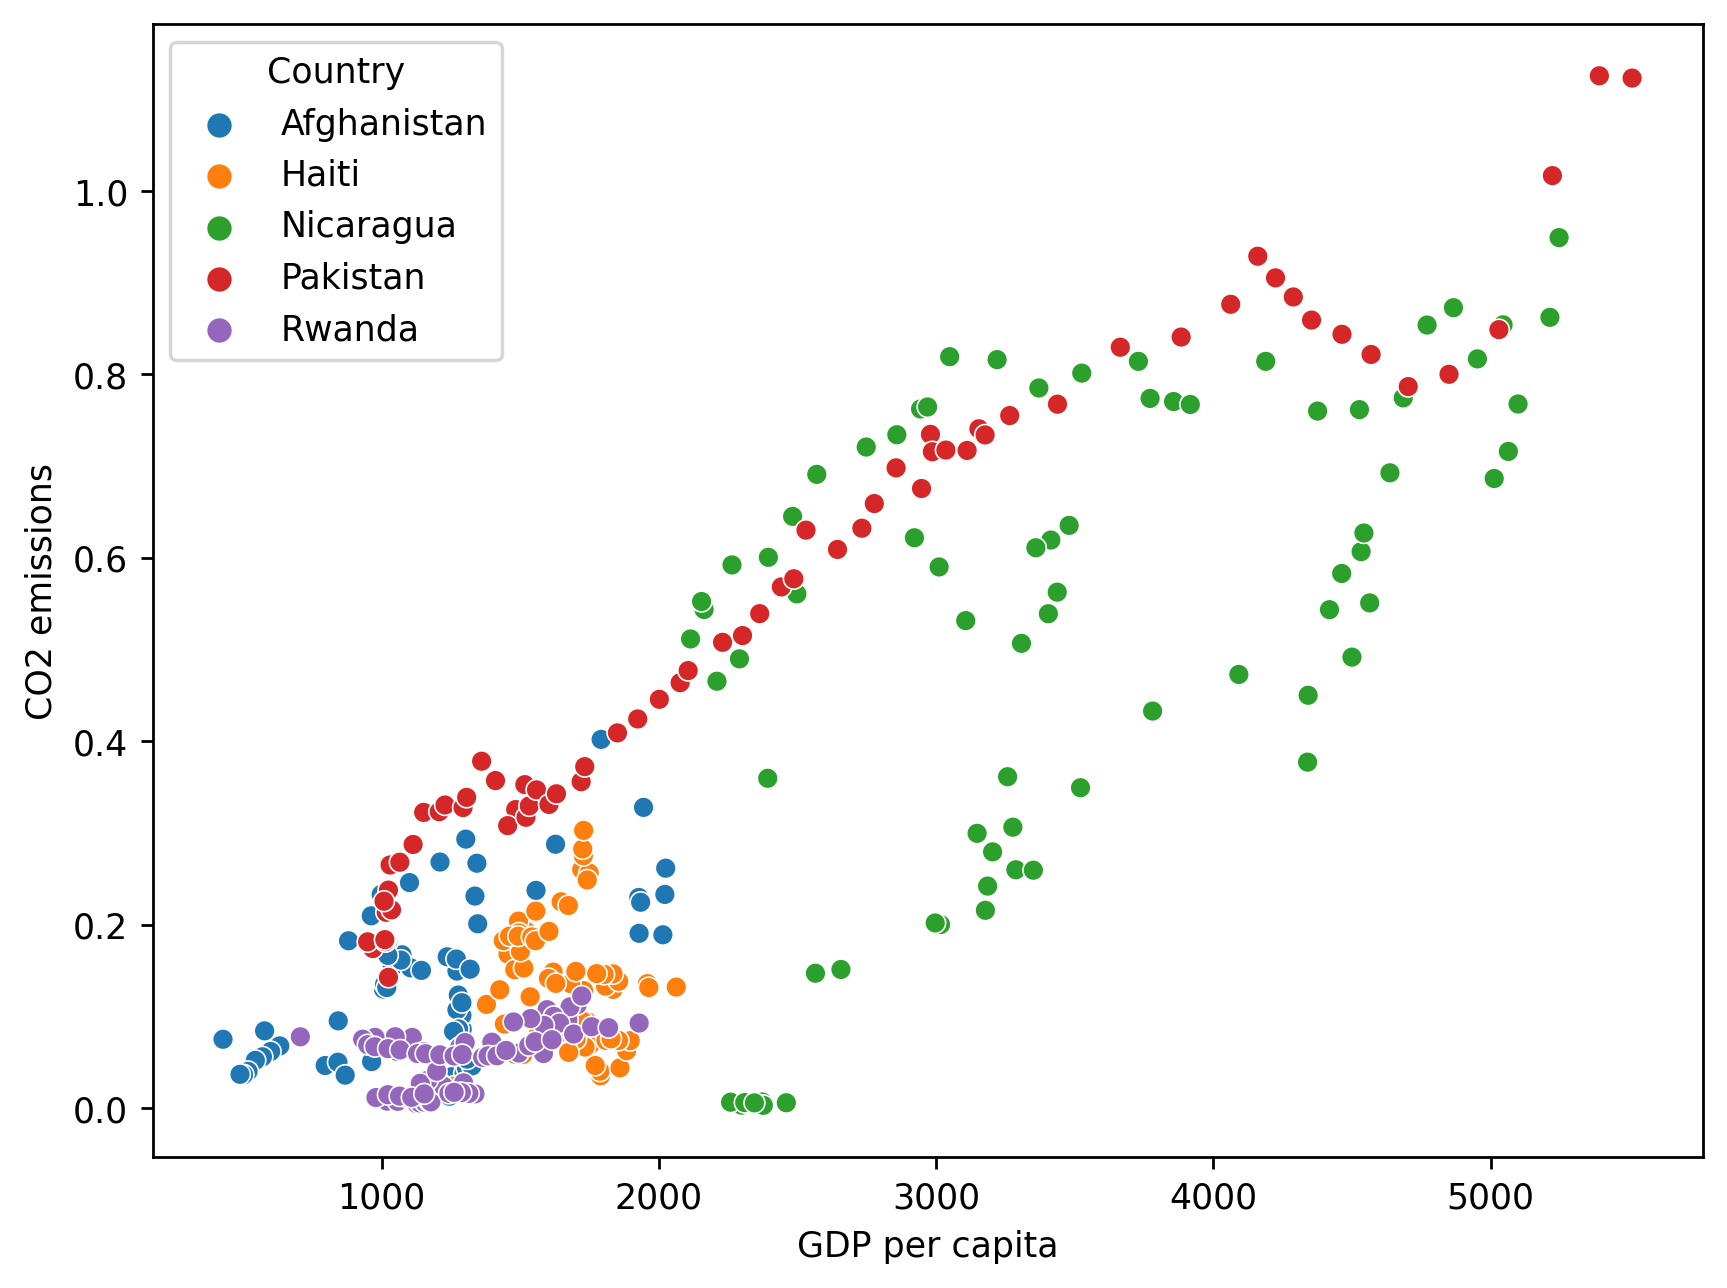

In [3]:
LIH_array = np.array(['Haiti', 'Afghanistan','Rwanda','Pakistan', 'Nicaragua'])
LIH_table = co2_table[co2_table['Country'].isin(LIH_array)]
LIH_table = LIH_table[(LIH_table['GDP per capita'] > 0) & (LIH_table['CO2 emissions'] > 0)]
plt.figure(figsize = (8,6), dpi=250)
sns.scatterplot(data=LIH_table, x='GDP per capita', y='CO2 emissions', hue='Country')
plt.show()

### Middle Income Countries
As an example, let's look at the BRICS countries, the rapidly growing upper middle income countries. 

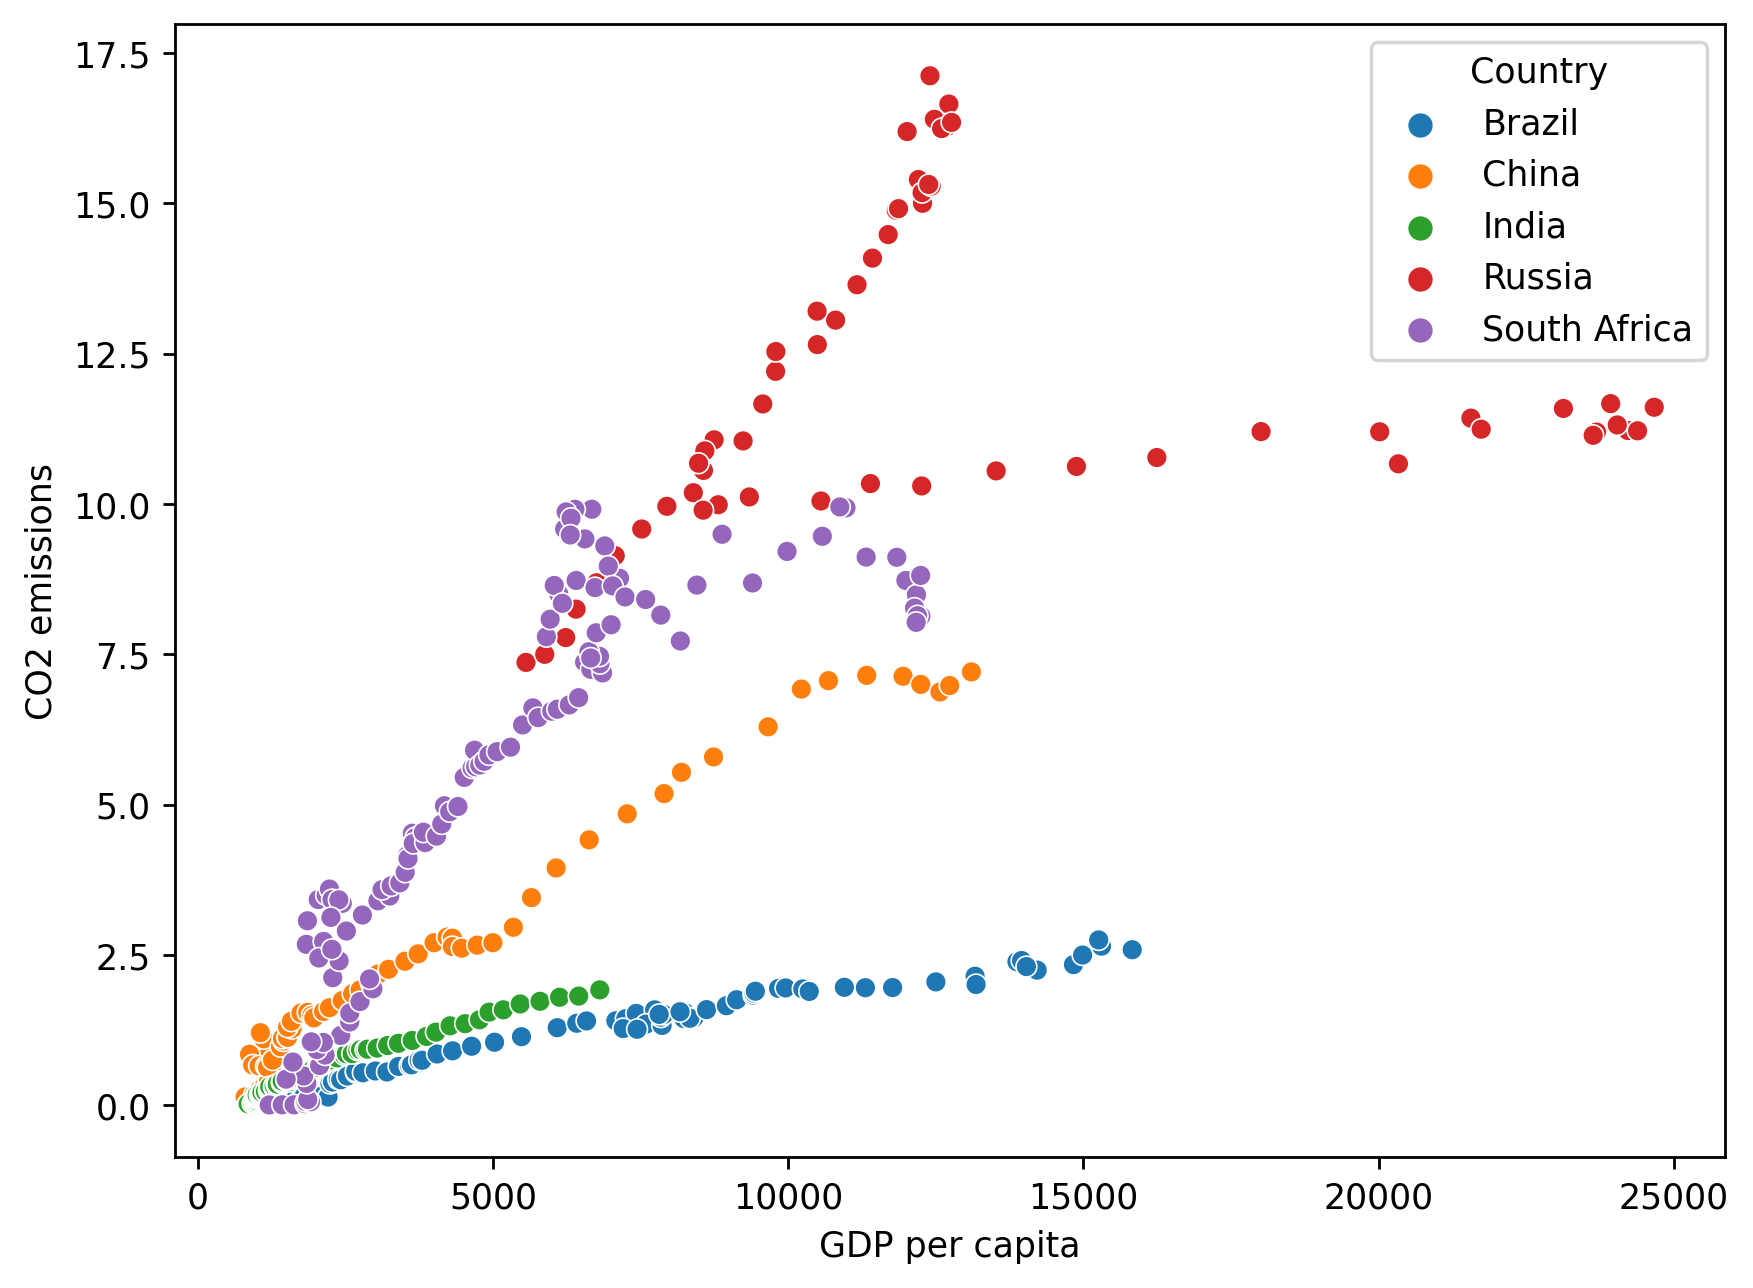

In [4]:
BRICS_array = np.array(['Brazil','Russia','India','China','South Africa'])
BRICS_table = co2_table[co2_table['Country'].isin(BRICS_array)]
BRICS_table = BRICS_table[(BRICS_table['GDP per capita'] > 0) & (BRICS_table['CO2 emissions'] > 0)]
plt.figure(figsize = (8,6), dpi=250)
sns.scatterplot(data=BRICS_table, x='GDP per capita', y='CO2 emissions', hue='Country')
plt.show()

### High Income Countries
Now let's turn our attention to high income countries. According to the Kuznets Hypothesis, we should see a pivot in the CO2 emissions. Let's use G7 countries as an example. 

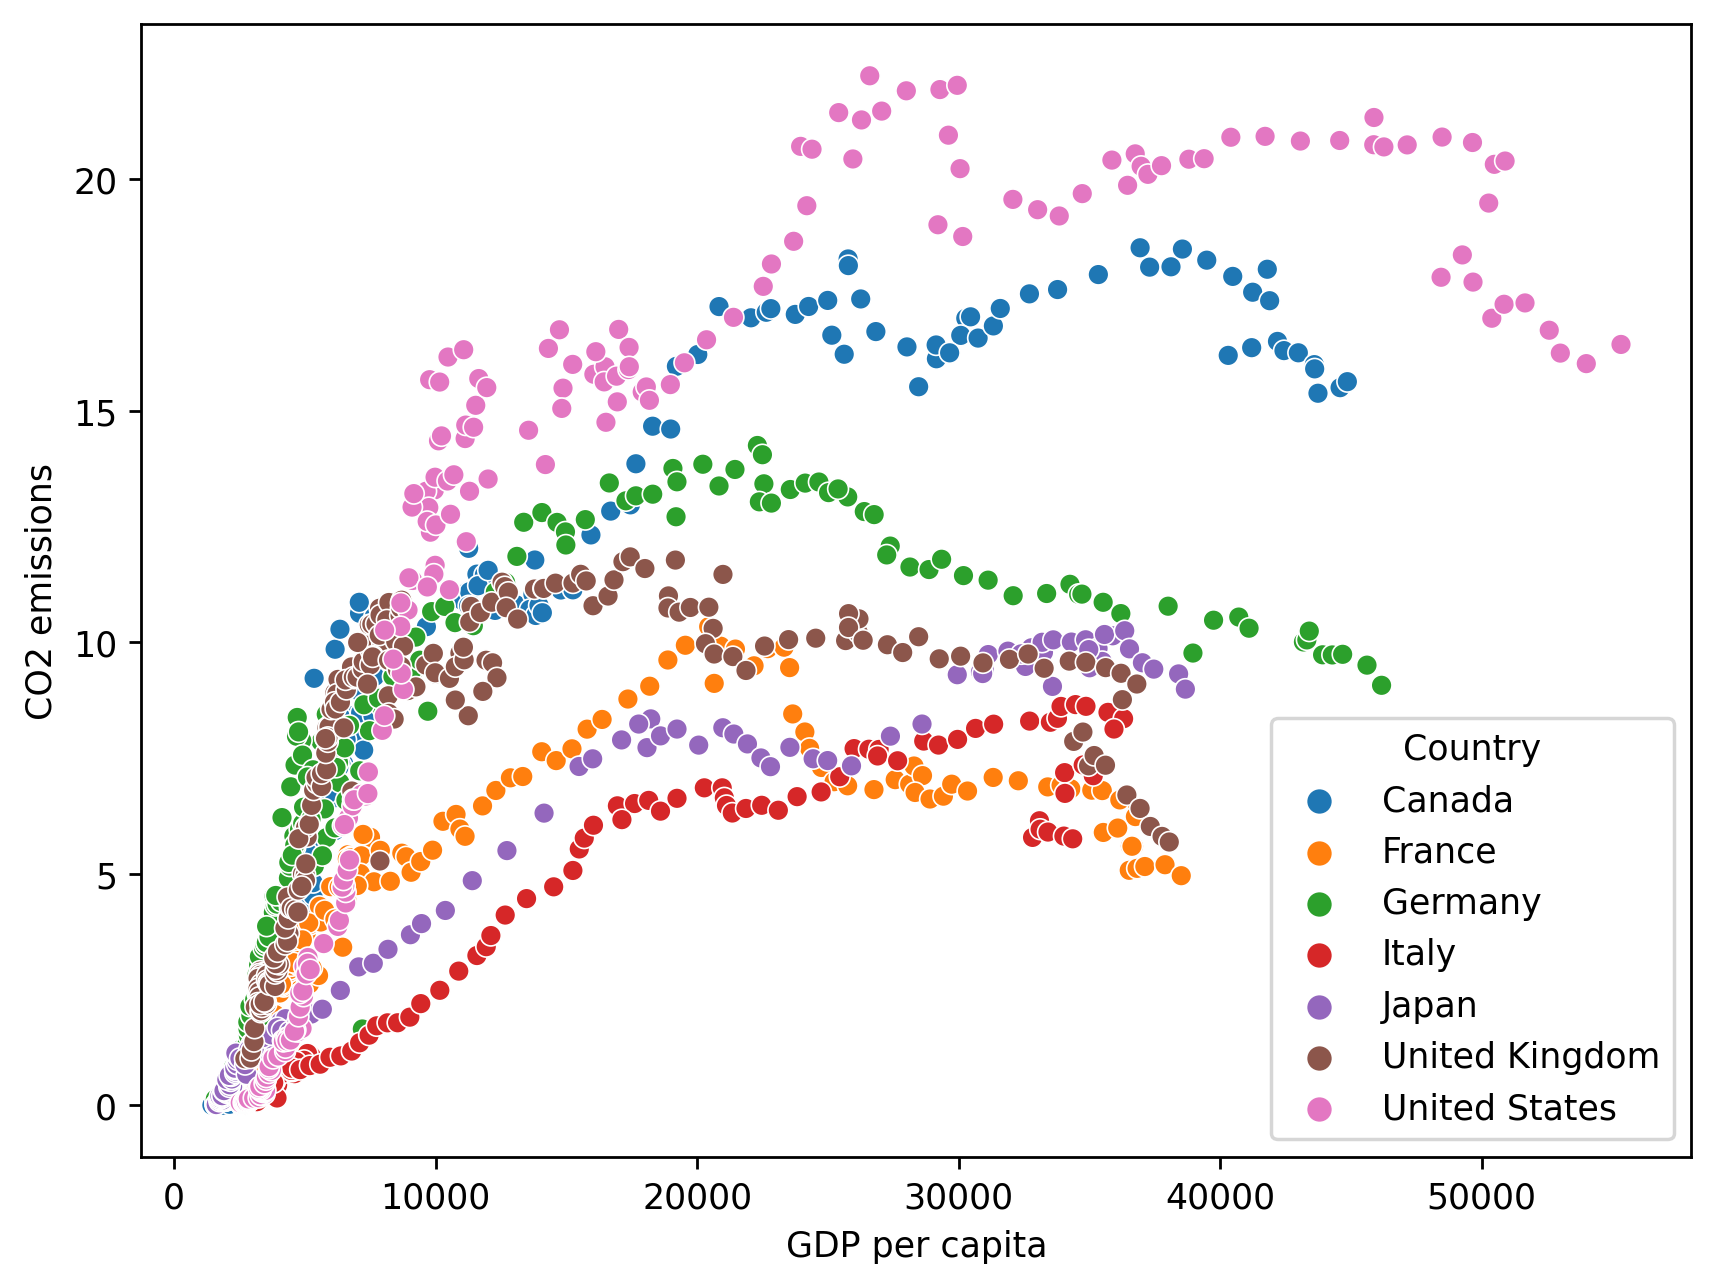

In [5]:
G7_array = np.array(['Canada','France','Germany','Italy','Japan', 'United Kingdom', 'United States'])
G7_table = co2_table[co2_table['Country'].isin(G7_array)]
G7_table = G7_table[(G7_table['GDP per capita'] > 0) & (G7_table['CO2 emissions'] > 0)]
plt.figure(figsize = (8,6), dpi=250)
sns.scatterplot(data=G7_table, x='GDP per capita', y='CO2 emissions', hue='Country')
plt.show()

It seems that the Kuznets Hypothesis is true!

Turns out we're ahead of the US in CO2 emissions per capita, but there's still a long way to go until our development resembles a full Kuznets curve. However, it certainly looks like something! An almost vertical linear growth in terms of per capita CO2 emissions in the early economic stages stagnated into a period of fluctuations. As of now, it looks like it’s heading in a downward trend.

Let's look at a set of other High Income Nations:

As in the US and Norway, these nations have experienced a boom, stagnation, and now to some extent a downward trend. Let's finally plot all the previously observed nations together:

In [6]:
LIH_table['income_level'] = ['L'] * len(LIH_table)
BRICS_table['income_level'] = ['M'] * len(BRICS_table)
G7_table['income_level'] = ['H'] * len(G7_table)
ALL_table = pd.concat([G7_table, BRICS_table, LIH_table])
ALL_table

,Country,Year,CO2 emissions,GDP per capita,Continent,income_level
9049,Canada,1820,0.0045,1441.000000,NaN,H
9059,Canada,1830,0.0031,1594.000000,NaN,H
9069,Canada,1840,0.0022,1852.000000,NaN,H
9079,Canada,1850,0.0237,2120.000000,NaN,H
9089,Canada,1860,0.1148,2313.000000,NaN,H
...,...,...,...,...,...,...
45812,Rwanda,2014,0.0746,1615.000000,NaN,L
45813,Rwanda,2015,0.0808,1693.000000,Africa,L
45814,Rwanda,2016,0.0888,1758.000000,NaN,L
45815,Rwanda,2017,0.0877,1819.083130,NaN,L


In [7]:
ALL_table[ALL_table["Country"]=="Canada"]

,Country,Year,CO2 emissions,GDP per capita,Continent,income_level
9049,Canada,1820,0.0045,1441.000000,NaN,H
9059,Canada,1830,0.0031,1594.000000,NaN,H
9069,Canada,1840,0.0022,1852.000000,NaN,H
9079,Canada,1850,0.0237,2120.000000,NaN,H
9089,Canada,1860,0.1148,2313.000000,NaN,H
...,...,...,...,...,...,...
9243,Canada,2014,15.9981,43607.000000,NaN,H
9244,Canada,2015,15.9066,43619.000000,North America,H
9245,Canada,2016,15.3799,43745.000000,NaN,H
9246,Canada,2017,15.5004,44591.640625,NaN,H


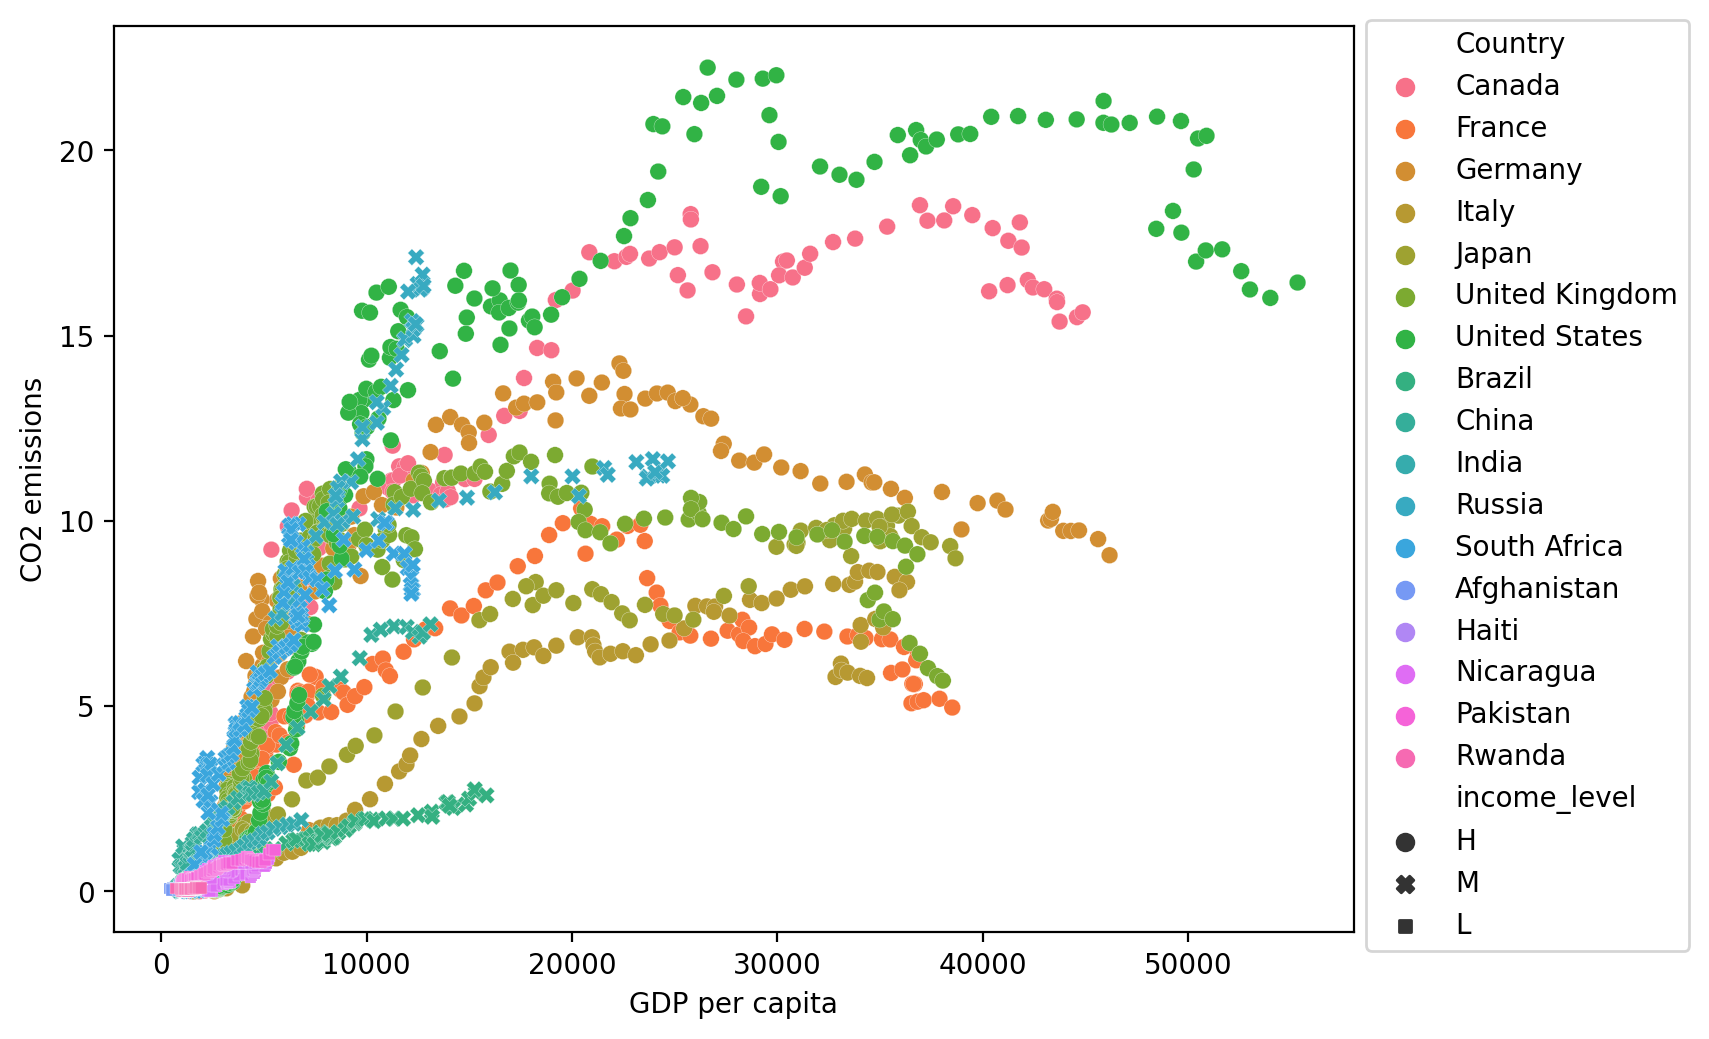

In [8]:
ALL_table = ALL_table[(ALL_table['GDP per capita'] > 0) & (ALL_table['CO2 emissions'] > 0)]
plt.figure(figsize = (8,6), dpi=200)
sns.scatterplot(data=ALL_table, x='GDP per capita', y='CO2 emissions', linewidth=0.1, hue='Country', style='income_level')
plt.legend(loc=(1.01, -0.02))
plt.show()

Here we see evidence for an Environmental Kuznets Curve.

It seems, at least to some extent, that as nations develop economically, the level of environmental degradation reaches a peak and then declines, mapping a downward-facing U-curve. 

### Criticism of the Environmental Kuznets Curve Hypothesis

Some, including Perman and Stern (2003) conclude that the level of environmental degradation has much more to do with a constant "battle" between scale and time than income alone. As nations scale up (BRICS, for instance) the growth results in higher emissions, while countries with lower growth (LIN & HIN) seem more influenced by the "time-effect", which results in lower emissions. Others, among Krueger & Grossman, argue that there is "no evidence that environmental quality deteriorates steadily with economic growth."